# 고유 분해

정방 행렬 $A$에 대해서 다음 식을 만족하는 벡터 $v$, 실수 $\lambda$를 찾을 수 있다고 가정하자.

$$ Av = \lambda v $$

* $ A \in \mathbf{R}^{N \times N} $

* $ \lambda \in \mathbf{R} $

* $ v \in \mathbf{R}^{N} $

위 식을 만족하는 실수 $\lambda$를 **고윳값**(eigenvalue), 벡터 $v$ 를 **고유 벡터**(eigenvector)라고 하며 고윳값과 고유 벡터를 찾는 작업을 **고유 분해**(eigen-decomposition)라고 한다.

예를 들어 행렬 $A$

$$
A=
\begin{bmatrix}
1 & -2 \\
2 & -3
\end{bmatrix}
$$
에 대해 다음 스칼라 값과 벡터는 각각 고윳값, 고유벡터가 된다.

$$\lambda = -1$$

$$
v=
\begin{bmatrix}
1  \\
1
\end{bmatrix}
$$

#### 연습 문제 1

위 행렬 $A$에 대해 $\lambda$와 $v$가 각각 고윳값, 고유벡터가 됨을 증명하라.

만약 행렬이 다음과 같다면,
$$ 
B =
\begin{bmatrix}
2 & 3 \\
2 & 1
\end{bmatrix}
$$

다음과 같은 두 가지 고윳값-고유벡터를 가진다.

$$ 
\lambda_1 = 4, \;\;
v_1 = \begin{bmatrix}
3 \\
2
\end{bmatrix}
$$


$$ 
\lambda_2 = -1, \;\;
v_2 = \begin{bmatrix}
-1 \\
1
\end{bmatrix}
$$

이 때 고유벡터 $v_1$, $v_2$와 방향이 같은 벡터는 모두 고유벡터가 되므로 보통은 크기가 1인 단위 벡터가 되도록 다음과 같이 정규화(normalization)을 해준다.

즉 첫번째 행렬 $A$에 대해서는

$$
v=
\begin{bmatrix}
\dfrac{1}{\sqrt{2}}  \\
\dfrac{1}{\sqrt{2}}
\end{bmatrix}
= 
\begin{bmatrix}
0.7071 \\
0.7071
\end{bmatrix}
$$

이고 두번째 행렬 $B$에 대해서는

$$ 
\lambda_1 = 4, \;\;
v_1 = 
\begin{bmatrix}
\dfrac{3}{\sqrt{13}} \\
\dfrac{2}{\sqrt{13}}
\end{bmatrix}
= 
\begin{bmatrix}
0.8321 \\
0.5547
\end{bmatrix}
$$

$$ 
\lambda_2 = -1, \;\;
v_2 = \begin{bmatrix}
-\dfrac{1}{\sqrt{2}} \\
\dfrac{1}{\sqrt{2}}
\end{bmatrix}
= 
\begin{bmatrix}
-0.7071 \\
0.7071
\end{bmatrix}
$$

로 쓰는 것이 일반적이다.

numpy linalg 서브패키지에서는 고윳값과 고유벡터를 구할 수 있는 `eig` 명령을 제공한다.
고윳값은 벡터의 형태로, 고유벡터는 고유벡터 행렬의 형태로 묶여서 나오면 고유벡터는 크기가 1되도록 이 정규화가 되어있다.

`eig` 명령의 결과로 나오는 고유벡터 행렬은 행이 아니라 **열을 고유벡터로 가진다**는 점에 주의한다. 수치 계산의 오류로 인해 중복되는 고윳값이 서로 다른 값으로 계산될 수도 있다.

In [1]:
w1, V1 = np.linalg.eig(np.array([[1, -2], [2, -3]]))

In [2]:
w1

array([-0.99999998, -1.00000002])

In [3]:
V1

array([[ 0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [4]:
w2, V2 = np.linalg.eig(np.array([[2, 3], [2, 1]]))

In [111]:
w2

array([ 4., -1.])

In [112]:
V2

array([[ 0.83205029, -0.70710678],
       [ 0.5547002 ,  0.70710678]])

#### 연습 문제 2

다음 행렬의 고윳값, 고유벡터를 구하라.

$$ 
\begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix}
$$

실수인 고윳값이 존재하지 않는 행렬도 있다. 예를 들어 다음 행렬은 복소수인 교윳값과 교유 벡터를 가진다.

$$ 
C =
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$

In [8]:
W3, V3 = np.linalg.eig(np.array([[0, -1], [1, 0]]))

In [9]:
W3

array([ 0.+1.j,  0.-1.j])

In [10]:
V3

array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
       [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]])

## 고윳값의 계산

행렬 $A$의 고유값은 다음과 같은 특성 방정식(characteristic equation)의 해와 같다.

$$ f(\lambda) = \det \left( A - \lambda I \right) = 0$$

예를 들어, 
$$
A=
\begin{bmatrix}
1 & -2 \\
2 & -3
\end{bmatrix}
$$

이면 

$$ 
\begin{eqnarray}
\det \left( A - \lambda I \right) 
&=&
\det 
\left(
\begin{bmatrix}
1 & -2 \\
2 & -3
\end{bmatrix}
-
\begin{bmatrix}
\lambda & 0 \\
0 & \lambda
\end{bmatrix}
\right) 
\\
&=&
\det 
\begin{bmatrix}
1 - \lambda & -2 \\
2 & -3 -\lambda
\end{bmatrix}
\\
&=& (1 - \lambda)(3 +\lambda) + 4 \\
&=& \lambda^2 + 2\lambda + 1 \\
&=& (\lambda + 1)^2 \\
&=& 0
\end{eqnarray}
$$

에서 고윳값은 -1이다. (고윳값 -1을 2개 가진다.)

고윳값을 알면 다음 연립 방정식을 풀어 고유 벡터를 구할 수 있다.

$$
(A - \lambda I)v = 0
$$

예로 든 행렬에서는

$$
\begin{bmatrix}
1+1 & -2 \\
2 & -3+1
\end{bmatrix}
\begin{bmatrix}
v_1 \\ v_2
\end{bmatrix}
= 0
$$

를 이용하면 $v_1 = v_2$ 인 모든 벡터가 고유 벡터임을 알 수 있다.

#### 연습 문제 3

특성 방정식을 이용하여 다음 행렬의 고윳값과 고유벡터를 구하라.

$$
\begin{bmatrix}
2 & 3 \\
2 & 1
\end{bmatrix}
$$

## 고유 분해의 성질

$N$차원의 정방 행렬 $A$의 고유 분해는 다음과 같은 성질을 가진다.

1. $N$개의 고윳값-고유벡터를 가진다. (복소수인 경우를 포함)
2. **대칭 행렬** $A$는 $N$개의 **실수 고윳값**을 가지며 고유 벡터들이 서로 **수직(orthogonal)**이다.
3. **대칭 행렬**의 고윳값이 모두 **양수**이면 **양의 정부호(positive-definite)**이다. 역도 성립한다.
4. 행렬 $A$가 **$X^TX$ 형태의 공분산 행렬**이면 **0또는 양의 고윳값**을 가진다.
5. 행렬의 **대각합은 모든 고윳값의 합**과 같다.
6. 행렬의 **행렬식은 모든 고윳값의 곱**과 같다.



## 대각화

$N$ 차원의 정방 행렬 $A$가 $N$개의 고윳값과 이에 대응하는 고유벡터를 가진다는 성질을 이용하면 다음처럼 행렬을 분해할 수 있다.  

행렬 $A$ 고윳값과 이에 대응하는 고유벡터를 각각 

$$ \lambda_1, \lambda_2, \cdots, \lambda_N \;\;\; v_1, v_2, \cdots, v_N $$

으로 표시하자. 이 고윳값과 고유벡터를 묶어서 다음과 같이 고유벡터 행렬, 고윳값 행렬을 정의할 수 있다. 

**고유벡터 행렬** $V$은 고유벡터를 옆으로 쌓아서 만든 행렬이다.

$$
V = \left[ v_1 \cdots v_N \right], \;\;\; V \in \mathbf{R}^{N \times N}
$$


**고윳값 행렬** $\Lambda$은 고유 값을 대각 성분으로 가지는 대각 행렬이다.

$$
\Lambda =
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{N} \\
\end{bmatrix}
, \;\;\; \Lambda \in \mathbf{R}^{N \times N}
$$

위와 같이 고유벡터 행렬과 고윳값 행렬을 정의하면 다음과 같은 식을 얻을 수 있다.


$$ 
\begin{eqnarray}
AV 
&=& A \left[ v_1 \cdots v_N \right] \\
&=& \left[ A v_1 \cdots A v_N \right] \\
&=& \left[ \lambda_1 v_1 \cdots \lambda_N v_N \right] \\
&=& \left[ v_1 \cdots v_N \right] 
\begin{bmatrix}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_{N} \\
\end{bmatrix}
\\
&=& V\Lambda
\end{eqnarray}
$$

$$ \therefore \; AV = V\Lambda $$

만약 $V$의 역행렬이 존재하면 다음 식이 성립한다. 이런 경우에는 **대각화 가능(diagonalizable)**이라고 한다.

$$ A = V \Lambda V^{-1} $$

#### 연습 문제 4

다음 행렬은 고윳값과 고유벡터로 대각화 가능한가?

$$ 
\begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix}
$$

## 대칭 행렬의 고유 분해

**행렬 $A$가 대칭(symmetric) 행렬**이면 

* 고유값이 실수이고
* 고유 벡터들이 **서로 수직(orthogonal)**이다.

고유 벡터가 직교하는 것은 다음처럼 증명할 수 있다.

서로 다른 고윳값 $\lambda_i$,  $\lambda_j$ $(\lambda_i \neq \lambda_j)$ 에 대응하는 고유벡터 $v_i$, $v_j$를 생각하자.

$$
\begin{eqnarray}
\lambda_i u_i^T u_j
&=& (\lambda_i u_i)^T u_j \\
&=& (A u_i)^T u_j \\
&=& u_i^T A_T u_j \\
&=& u_i^T A u_j \\
&=& u_i^T \lambda_j u_j \\
&=& \lambda_j u_i^T  u_j \\
(\lambda_i - \lambda_j) u_i^T  u_j &=& 0 \\
 u_i^T  u_j &=& 0
\end{eqnarray}
$$

만약 고유벡터가 크기 1이 되도록 정규화된 상태라면 고유벡터 행렬 $V$는 다음과 같이 **전치 행렬이 역행렬**이다. 따라서 대각화 가능하다.

$$ V^T V = V V^T = I$$

$$ V^{-1} = V^T $$

따라서  행렬 $A$를 $N$개의 대칭 행렬 $A_i = v_i v_i^T$ 의 합으로 표시할 수 있다.

$$ A = V\Lambda V^T = \sum_{i=1}^{N} {\lambda_i} v_i v_i^T = \lambda_1 A_1 + \cdots + \lambda_N A_N $$


만약 0인 고윳값이 없다면 다음처럼 역행렬을 구할 수 있다.

$$ A^{-1} = V \Lambda^{-1} V^T = \sum_{i=1}^{N} \dfrac{1}{\lambda_i} v_i v_i^T = \dfrac{1}{\lambda_1} A_1 + \cdots + \dfrac{1}{\lambda_N} A_N $$

#### 연습 문제 5

다음 행렬

$$ 
\begin{bmatrix}
2 & 3 \\
2 & 1
\end{bmatrix}
$$

의 고윳값과 고유벡터는 다음과 같다. 이 정보를 이용하여 역행렬을 계산하라.

$$ 
\lambda_1 = 4, \;\;
v_1 = 
\begin{bmatrix}
\dfrac{3}{\sqrt{13}} \\
\dfrac{2}{\sqrt{13}}
\end{bmatrix}
$$

$$ 
\lambda_2 = -1, \;\;
v_2 = \begin{bmatrix}
-\dfrac{1}{\sqrt{2}} \\
\dfrac{1}{\sqrt{2}}
\end{bmatrix}
$$

## 고윳값과 양의 정부호

**대칭 행렬의 고윳값이 모두 양수이면 그 행렬은 양의 정부호(positive definite)**가 됨을 증명할 수 있다.

우선 고유 분해로 만들어진 행렬 $A_i = v_iv_i^T$는 양-반한정이다. $x$가 $v_i$와 수직인 경우에만 0이 된다.

$$ x^T A_i x = x^T v_iv_i^T x = (x^T v_i)^T(x^T v_i) = || x^T v_i || \geq 0 $$

여기에 양수인 고윳값을 곱한 행렬 $\lambda_i A_i$도 마찬가지이다. 이러한 행렬들을 모두 더한 행렬 $\lambda_1 A_1 + \cdots + \lambda_N A_N $ 은 양한정이다. 왜나하면 모든 고유 벡터의 집합은 $N$ 차원에서 기저 벡터를 이루기 때문에 동시에 모든 기저 벡터와 수직인 벡터는 존재하지 않기 때문이다.

반대로 **양의 정부호(positive definite)인 대칭 행렬의 고윳값은 항상 양수**이다. 만약 0이나 음수인 고윳값 $\lambda \leq 0$가 존재한다면 다음처럼 이차 형식이 양수가 아닐 수 있기 때문이다.

$$ v_i^T A v_i = v_i^T \lambda_i v_i = \lambda_i v_i^T v_i \leq 0 $$

## 공분산 행렬

임의의 실수 행렬 $X$에 대해 $X^TX$인 정방행렬을 **공분산 행렬(covariance matrix)**이라고 한다. 공분산 행렬의 의미는 확률 분포에서 더 자세하게 공부하게 될 것이며 일단 여기에서는 위와 같은 방법으로 계산되는 행렬을 가리키는 명칭이라는 것만 알면 충분하다. 

**공분산 행렬은 양의 준정부호(positive semidefinite)**이다. 이는 다음과 같이 증명한다.

$$ v^TX^TXv = (Xv)^T(Xv) = u^Tu $$

즉, 모든 벡터 $v$에 대해 공분산 행렬에 대한 이차 형식은 어떤 벡터의 제곱합이 된다. 따라서 양수인 고윳값만 가진다.

## 고윳값과 대각합/행렬식

특성 방정식의 해가 고윳값이므로 다음과 같이 쓸 수 있다.

$$
0 = f(\lambda) = \prod_{i=1}^N (\lambda-\lambda_i)=\lambda^N - \lambda^{n-1} \sum_{i=1}^N \lambda_i + \cdots + (-1)^N \prod_{i=1}^N \lambda_i.
$$

이 수식에서 $\lambda=0$을 대입하면

$$ f(0)=\det(-A)=(-1)^N \prod_{i=1} \lambda_i $$

그런데, 행렬식(determinant)을 계산할 때 사용하는 행(또는 열)의 부호를 바꾸면 다음 관계가 성립한다.

$$ \det(A)=(-1)^N\det(-A) $$

따라서 **모든 고윳값의 곱은 행렬식의 값**과 같다.

$$
\det(A)=\prod_{i=1}^N \lambda_i
$$

비슷한 방법으로 **모든 고윳값의 합은 대각합(trace)의 값**과 같다는 것을 보일 수 있다.

$$
\text{tr}(A) =\sum_{i=1}^N \lambda_i
$$

## 행렬의 간략화

이 때 각 $A_i$의 크기는 모두 동일하기 때문에 가장 작은 고윳값 몇개를 생략해도 원래의 행렬과 큰 차이가 나지 않을 수도 있다. 

$$ 
\begin{eqnarray}
A 
&=&  \lambda_1 A_1 + \cdots + \lambda_{N} A_{N} \;\; ( \lambda_1 > \cdots > \lambda_N )\\
&\approx& \lambda_1 A_1 + \cdots + \lambda_{M} A_{M} \;\; ( N > M )
\end{eqnarray}
$$

## 가우시안 정규 분포의 좌표 변환

다변수 가우시안 정규 분포의 확률 밀도 함수 $\mathcal{N}(x)$는 다음처럼 표시할 수 있다. 이 식에서 공분산 행렬 $\Sigma$은 대칭 행렬이므로 위의 관계가 성립하고 따라서  

$$
\begin{eqnarray}
\mathcal{N}(x) 
&\propto& \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
&=& \exp \left( -\dfrac{1}{2} (V^{-1}(x-\mu))^T  \Lambda^{-1} (V^{-1} (x-\mu)) \right) \\
&=& \exp \left( -\dfrac{1}{2} x'^T  \Lambda^{-1} x' \right) \\
\end{eqnarray}
$$

즉 고유벡터 행렬 $V$ 를 변환 행렬로 사용하여 $x$ 를 $x' = V^T(x-\mu)$ 로 좌표 변환하면, 좌표 변환된 새로운 $x'$ 들의 공분산 행렬은 대각 행렬인 고윳값 행렬 $\Lambda$ 가 된다. 즉 좌표 변환된 $x'$ 들은 서로 독립인 성분이 된다. 또한 고유벡터 행렬 $V$의 각 열, 즉 고유 벡터들은 독립인 성분을 가리키는 기저 벡터가 된다. 

In [82]:
mu = [2, 3]
cov = [[4, 3],[3, 5]]

In [83]:
w, V = np.linalg.eig(cov)

In [84]:
w

array([ 1.45861873,  7.54138127])

In [85]:
V

array([[-0.76301998, -0.6463749 ],
       [ 0.6463749 , -0.76301998]])

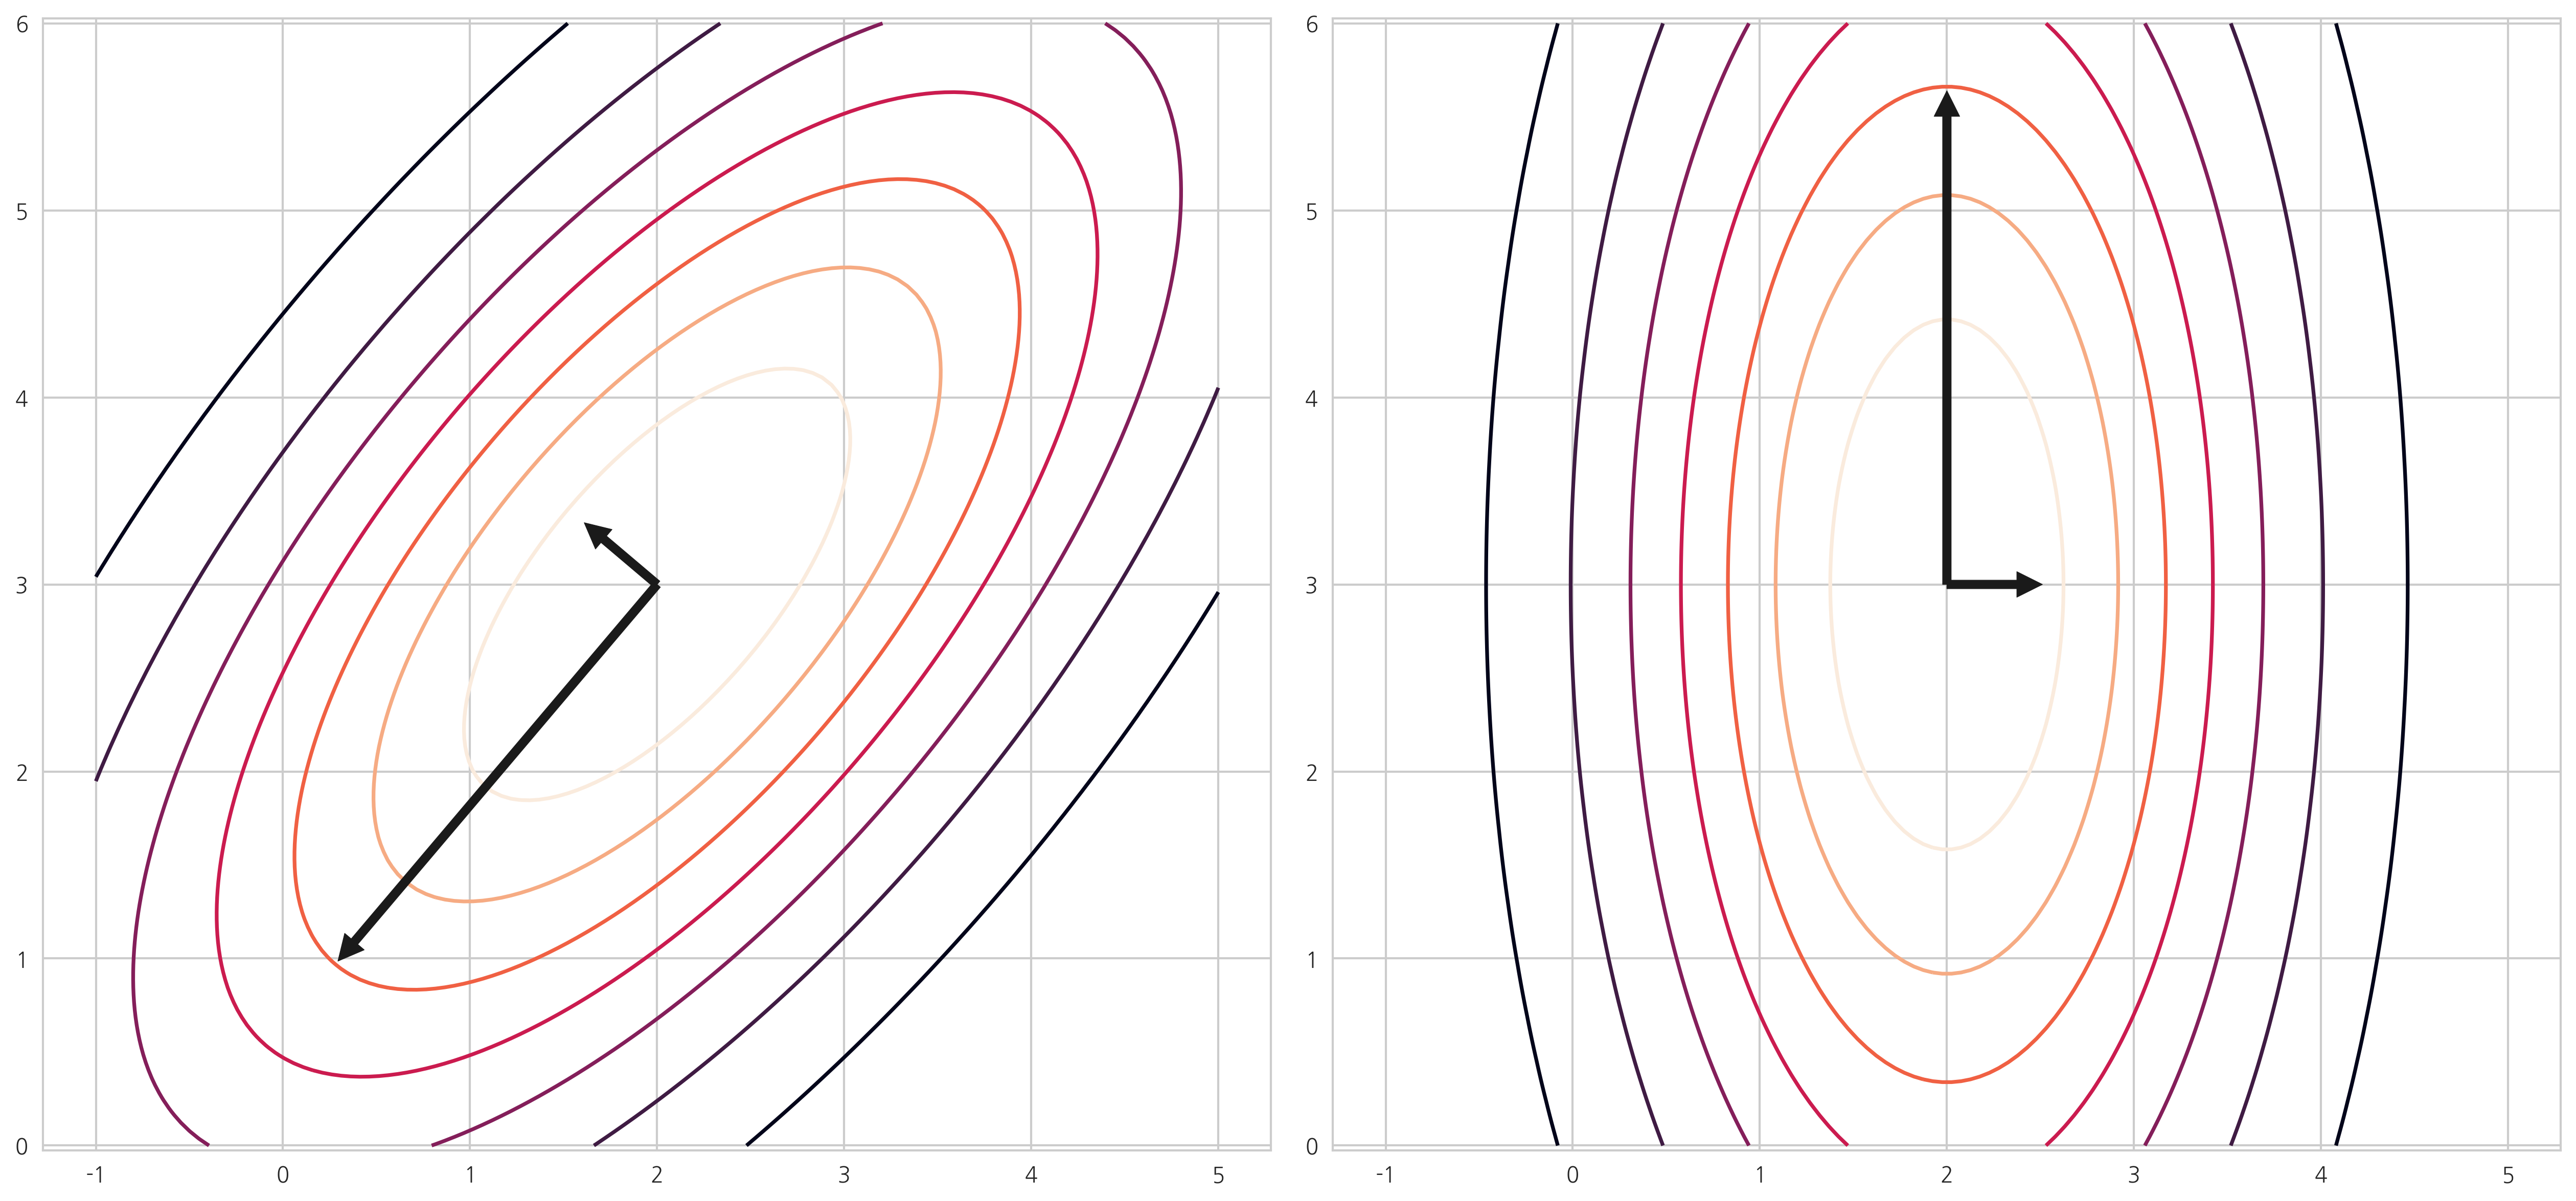

In [103]:
xx = np.linspace(-1, 5, 120)
yy = np.linspace(0, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.figure(figsize=(17, 8))

plt.subplot(121)
rv1 = sp.stats.multivariate_normal(mu, cov)
plt.contour(XX, YY, rv1.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * V[:,0]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * V[:,1]), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.subplot(122)
rv2 = sp.stats.multivariate_normal(mu, w) # 좌표 변환
plt.contour(XX, YY, rv2.pdf(np.dstack([XX, YY])))
plt.annotate('', xy=(mu + 0.35 * w[0] * np.array([1, 0])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.annotate('', xy=(mu + 0.35 * w[1] * np.array([0, 1])), xytext=mu, arrowprops=dict(facecolor='k'))
plt.axis("equal")

plt.tight_layout()
plt.show()